Correlation and Relationships: 
==============================

Correlation matrix between gold price and other features, and groups of features below?
- **Precious Metals:** GOLD_open, GOLD_high, GOLD_low, GOLD_close,
- **Industrial Commodities (Hàng hóa công nghiệp):** Copper, Silver, Crude Oil. 
- **Alternative Energy (Năng lượng thay thế):** NLR
- **Currency and Economic Indicators (Chỉ số tiền tệ và kinh tế):** DXY, EURUSD
- **Stock Market Indices (Chỉ số thị trường chứng khoán):** MSCI, NASDAQ, RUT, SP500
- **Volatility Index (chỉ số biến động):** VIX


# ***1. Data Understanding***

In [36]:
import pandas as pd
# gold_df = pd.read_csv("data_preparation.csv")
file_path = 'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/merged_data/data_preparation.csv'
gold_df = pd.read_csv(file_path)
gold_df.head(10)


,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
1,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
2,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
3,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
4,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
5,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
6,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
7,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
8,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
9,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91


In [37]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3523 non-null   object 
 1   GOLD_open   3523 non-null   float64
 2   GOLD_high   3523 non-null   float64
 3   GOLD_low    3523 non-null   float64
 4   GOLD_close  3523 non-null   float64
 5   copper      3523 non-null   float64
 6   crude_oil   3523 non-null   float64
 7   DXY         3523 non-null   float64
 8   EURUSD      3523 non-null   float64
 9   MSCI        3523 non-null   float64
 10  NASDAQ      3523 non-null   float64
 11  NLR         3523 non-null   float64
 12  RUT         3523 non-null   float64
 13  silver      3523 non-null   float64
 14  SP500       3523 non-null   float64
 15  VIX         3523 non-null   float64
dtypes: float64(15), object(1)
memory usage: 440.5+ KB


In [38]:
print(gold_df.columns)

Index(['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
       'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'RUT', 'silver',
       'SP500', 'VIX'],
      dtype='object')


In [39]:
# Tạo danh sách tên cột mới
grouped_columns_list = ['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
                'silver', 'crude_oil', 'NLR', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'RUT', 
                'SP500', 'VIX']


# Sắp xếp lại DataFrame với danh sách tên cột mới
gr_gold_df = gold_df[grouped_columns_list]
gr_gold_df.head(10)

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,silver,crude_oil,NLR,DXY,EURUSD,MSCI,NASDAQ,RUT,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
1,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
2,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
3,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
4,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
5,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
6,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
7,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
8,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91
9,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,23.285,80.51,71.36,105.02,1.0732,497.76,13478.28,1760.71,4358.34,14.91


In [40]:
gr_gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3523 non-null   object 
 1   GOLD_open   3523 non-null   float64
 2   GOLD_high   3523 non-null   float64
 3   GOLD_low    3523 non-null   float64
 4   GOLD_close  3523 non-null   float64
 5   copper      3523 non-null   float64
 6   silver      3523 non-null   float64
 7   crude_oil   3523 non-null   float64
 8   NLR         3523 non-null   float64
 9   DXY         3523 non-null   float64
 10  EURUSD      3523 non-null   float64
 11  MSCI        3523 non-null   float64
 12  NASDAQ      3523 non-null   float64
 13  RUT         3523 non-null   float64
 14  SP500       3523 non-null   float64
 15  VIX         3523 non-null   float64
dtypes: float64(15), object(1)
memory usage: 440.5+ KB


# ***2. Correlation Matrix and Heatmap***

            GOLD_open  GOLD_high  GOLD_low  GOLD_close    copper    silver  \
GOLD_open    1.000000   0.999368  0.999140    0.998684  0.639958  0.558106   
GOLD_high    0.999368   1.000000  0.998923    0.999304  0.638259  0.559829   
GOLD_low     0.999140   0.998923  1.000000    0.999446  0.641247  0.555943   
GOLD_close   0.998684   0.999304  0.999446    1.000000  0.640701  0.559281   
copper       0.639958   0.638259  0.641247    0.640701  1.000000  0.705373   
silver       0.558106   0.559829  0.555943    0.559281  0.705373  1.000000   
crude_oil    0.245454   0.244266  0.244947    0.244930  0.671914  0.583953   
NLR          0.176872   0.174573  0.181433    0.178333  0.510635  0.277627   
DXY          0.210975   0.208196  0.215886    0.210647 -0.250720 -0.558522   
EURUSD      -0.158916  -0.156367 -0.163451   -0.158674  0.318070  0.568651   
MSCI         0.743905   0.741534  0.747886    0.744374  0.441837  0.000908   
NASDAQ       0.661446   0.658206  0.666019    0.661586  0.339554

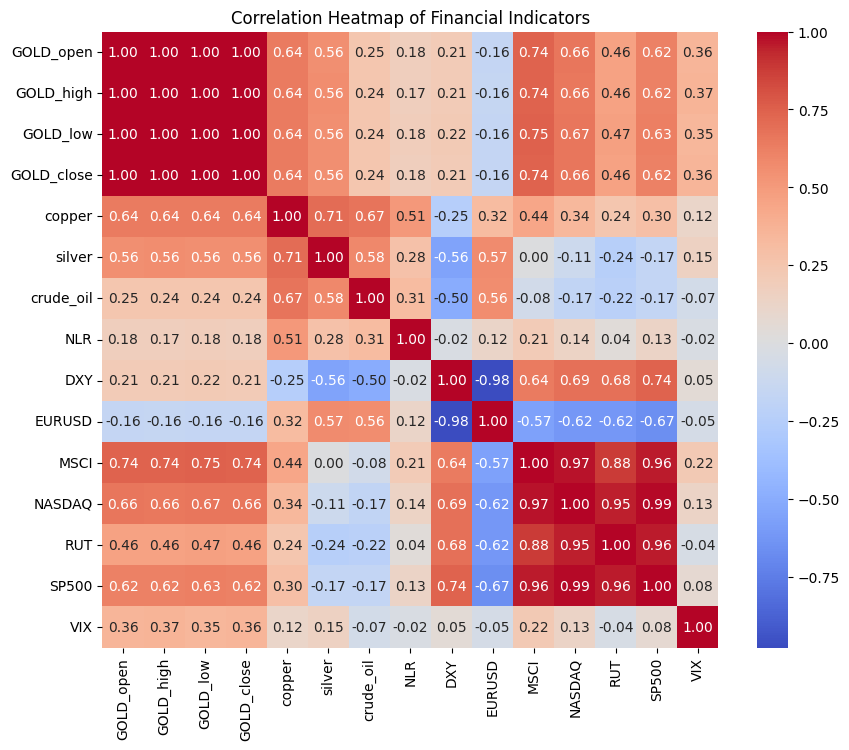

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the Correlation Matrix
correlation_columns = gr_gold_df.columns[1:] # Selecting relevant columns for correlation - without 'Date'
correlation_matrix = gr_gold_df[correlation_columns].corr()
print(correlation_matrix)
# Vẽ heatmap từ correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Financial Indicators')
plt.show()


### EDA - Correlation Matrix and Heatmap: 

### General comment:
Gold exhibits varying degrees of correlation with financial indices, reflecting its complex position in the global financial system:
1. **Correlation with Stock Market Indexes**: Gold has a strong positive correlation with stock market indexes such as MSCI, NASDAQ, and S&P 500. This may reflect the fact that During periods of economic growth, both the stock market and gold prices tend to increase due to increased investor confidence in risky assets and haven assets.
2. **Correlation with Industrial Commodities**: Gold also shows a positive correlation with industrial commodities such as copper and silver, indicating that general market dynamics such as the overall economic situation demand and changes in physical needs can affect their prices.
3. **Weak correlation with Crude Oil and Alternative Energy Index (NLR)**: This correlation is lower, possibly because crude oil and alternative energies react strongly to specific factors such as energy policy and global supply and demand.
4. **Negative Correlation with Currencies**: Gold has a weak negative correlation with DXY and EURUSD, suggesting that while it can act as a hedge against currency depreciation, the factors Other factors also affect gold prices.
5. **Weak correlation with VIX**: This demonstrates that gold can be sought during times of market volatility as a safe haven asset, but not as a sole option or Automatic response in all volatile situations.

Nhận Xét Chung:
Vàng thể hiện mức độ tương quan khác nhau với các chỉ số tài chính, phản ánh vị thế phức tạp của nó trong hệ thống tài chính toàn cầu:
1. **Tương quan với Chỉ số Thị trường Chứng khoán**: Vàng có mối tương quan tích cực mạnh với các chỉ số thị trường chứng khoán như MSCI, NASDAQ, và S&P 500. Điều này có thể phản ánh sự thật là trong thời kỳ tăng trưởng kinh tế, cả thị trường chứng khoán và giá vàng đều có xu hướng tăng giá do lòng tin của nhà đầu tư vào tài sản rủi ro và tài sản trú ẩn tăng lên.
2. **Tương quan với Hàng hóa Công nghiệp**: Vàng cũng cho thấy mối tương quan tích cực với các mặt hàng công nghiệp như đồng và bạc, cho thấy rằng những động lực chung của thị trường như tình hình kinh tế toàn cầu và sự thay đổi trong nhu cầu vật chất có thể ảnh hưởng đến giá cả của chúng.
3. **Tương quan yếu với Dầu thô và Chỉ số Năng lượng Thay thế (NLR)**: Tương quan này thấp hơn, có thể do dầu thô và năng lượng thay thế phản ứng mạnh mẽ với các yếu tố cụ thể như chính sách năng lượng và cung cầu toàn cầu.
4. **Tương quan nghịch với Tiền tệ**: Vàng có mối tương quan nghịch yếu với DXY và EURUSD, cho thấy rằng mặc dù nó có thể hành động như một phòng hộ chống lại sự mất giá tiền tệ, nhưng các yếu tố khác cũng có ảnh hưởng đến giá vàng.
5. **Mối tương quan yếu với VIX**: Điều này chứng tỏ rằng vàng có thể được tìm đến trong thời kỳ biến động thị trường như một tài sản trú ẩn an toàn, nhưng không phải là một lựa chọn duy nhất hay phản ứng tự động trong mọi tình huống biến động.



### Summary of Gold's Role:
- **Gold as a Safe Haven Asset**: Gold is considered a safe investment amid uncertainty, political instability, and economic downturn, but its response to events is Specific events may vary depending on the origin and nature of those events.
- **Investor Psychology and Risk Management**: Investors tend to restructure portfolios and shift capital into gold during periods of high volatility as part of a risk management strategy ro.
- **Effects of Inflation and Interest Rates**: Gold also reacts to inflation and interest rates, increasing in price when real interest rates fall and when inflation reduces the value of paper currency.
- **US Dollar**: Gold is typically inversely correlated to the value of the US dollar, with gold prices rising when the dollar weakens.
Gold is not only a safe asset but also a versatile investment asset, closely related to many macroeconomic factors and market psychology. Understanding these relationships is important for strategic asset allocation and risk management within a portfolio.

Tổng Kết Vai Trò của Vàng:
- **Vàng như một Tài sản Trú ẩn An toàn**: Vàng được coi là kênh đầu tư an toàn trong bối cảnh không chắc chắn, bất ổn chính trị, và suy thoái kinh tế, nhưng phản ứng của nó với các sự kiện cụ thể có thể biến đổi tùy thuộc vào nguồn gốc và bản chất của những sự kiện đó.
- **Tâm lý Nhà đầu tư và Quản lý Rủi ro**: Nhà đầu tư có xu hướng tái cơ cấu danh mục đầu tư và chuyển dịch vốn vào vàng trong thời kỳ biến động cao như một phần của chiến lược quản lý rủi ro.
- **Ảnh hưởng của Lạm phát và Lãi suất**: Vàng còn phản ứng với lạm phát và lãi suất, tăng giá khi lãi suất thực giảm và khi lạm phát làm suy giảm giá trị tiền tệ giấy.
- **Đồng Đô la Mỹ**: Vàng thường có tương quan nghịch với giá trị của đồng đô la Mỹ, với việc giá vàng tăng khi đô la yếu đi.
Vàng không chỉ là tài sản an toàn mà còn là tài sản đầu tư đa năng, có mối liên hệ mật thiết với nhiều yếu tố kinh tế vĩ mô và tâm lý thị trường. Hiểu được những mối quan hệ này quan trọng cho việc phân bổ tài sản chiến lược và quản lý rủi ro trong một danh mục đầu tư.